# *Spam SMS Detection AI Model*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load a dataset:

In [2]:
data = pd.read_csv("D:/Ayaazz/datasets/spam.csv", encoding="latin-1")
data.head(20)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


# *Data Preprocessing*

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Check Null-values:

In [4]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Dropping unnecessary features:

In [5]:
df = data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


Scikit-learn library

In [7]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Label-Encoding

In [8]:
label = LabelEncoder()
df['v1'] = label.fit_transform(df['v1'])
df

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [9]:
df.columns

Index(['v1', 'v2'], dtype='object')

# *Model Training*

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df['v2'], df['v1'], random_state=42, test_size=0.2)

**TF-IDF(Term Frequency-Inverse Document Frequency)**

In [11]:
# transforms the text features into numerical features
tf = TfidfVectorizer()
tf_x_train = tf.fit_transform(x_train)
tf_x_test = tf.transform(x_test)

**Model training with Naive Bayes:**

In [12]:
# GaussianNB takes dense data but here it receives sparse matrix so for the conversion of the data I passed .toarray() function to data
nb = GaussianNB()
nb.fit(tf_x_train.toarray(), y_train) 

GaussianNB()

In [13]:
y_pred = nb.predict(tf_x_test.toarray())

Accuracy Score of Naive Bayes:

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score of Naive Bayes is: { {accuracy} }")

Accuracy score of Naive Bayes is: {0.8968609865470852}


Classification Report of naive Bayes:

In [15]:
classification = classification_report(y_test, y_pred)
print("Classification report: \n", classification)

Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.90      0.94       965
           1       0.57      0.90      0.70       150

    accuracy                           0.90      1115
   macro avg       0.78      0.90      0.82      1115
weighted avg       0.93      0.90      0.91      1115



Confusion Matrix of Naive Bayes:

In [16]:
con = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n", con)

Confusion matrix: 
 [[865 100]
 [ 15 135]]


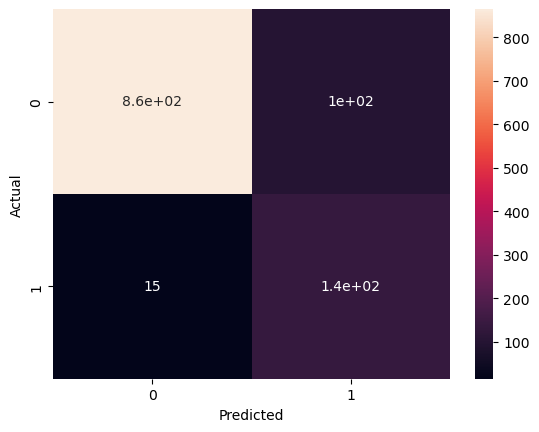

In [17]:
sns.heatmap(con, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Model training with Logistic Regression:**

In [18]:
log = LogisticRegression()
log.fit(tf_x_train, y_train)

LogisticRegression()

In [19]:
y_pred = log.predict(tf_x_test)

Accuracy Score of Logistic Regression:

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score of logistic regression is: { {accuracy} }")

Accuracy score of logistic regression is: {0.9659192825112107}


Classification Report of Logistic Regression:

In [21]:
classification = classification_report(y_test, y_pred)
print("Classification report: \n", classification)

Classification report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.99      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



Confusion Matrix of Logistic Regression:

In [22]:
con = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n", con)

Confusion matrix: 
 [[964   1]
 [ 37 113]]


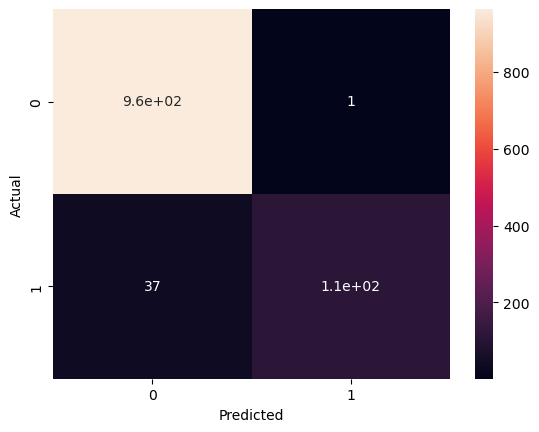

In [23]:
sns.heatmap(con, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Model training with Support Vector Machine(SVM):**

In [24]:
s = SVC()
s.fit(tf_x_train, y_train)

SVC()

In [25]:
y_pred = s.predict(tf_x_test)

Accuracy Score of SVM:

In [26]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score of support vector machine is: { {accuracy} }")

Accuracy score of support vector machine is: {0.9820627802690582}


Classification Report of SVM:

In [27]:
classification = classification_report(y_test, y_pred)
print("Classification report: \n", classification)

Classification report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



Confusion Matrix of SVM:

In [28]:
con = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n", con)

Confusion matrix: 
 [[965   0]
 [ 20 130]]


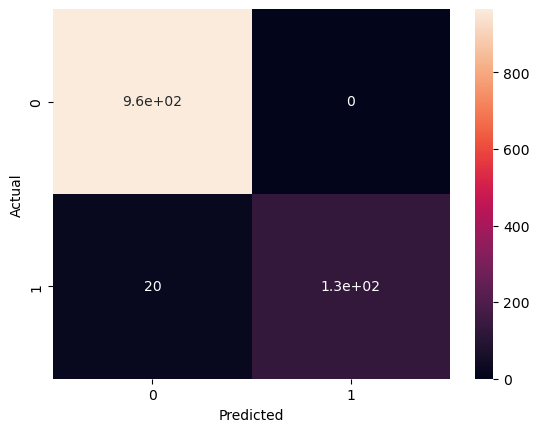

In [29]:
sns.heatmap(con, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()